# Exemple simple de regression linéaire

## 1. Importation des librairies

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl

## 2. Définition des données d'apprentissage

# On fixe la seed pour des résultats reproductibles
torch.manual_seed(1)

In [2]:
a = 0.1
b = -0.5
X = np.arange(0, 1, 0.05)
Y_gt = a * X + b
noise = 0.02
Y = Y_gt + np.random.uniform(-noise,noise, X.shape).astype(np.float32)

## 3. Architecture du réseau 

In [3]:
class LinearRegressionModel(pl.LightningModule):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        #une première couche avec un neurone (couche cachée)
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

    def training_step(self, batch):
        x, y = batch
        y_pred = self(x)
        # On défini la fonction de coût utlisée
        loss = nn.functional.mse_loss(y_pred, y)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        # On choisit la méthode d'optimisation
        optimizer = optim.SGD(self.parameters(), lr=0.01, momentum=0.9)
        return optimizer
    
# On crée une instance de ce modèle
model = LinearRegressionModel()


## 4. Apprentissage du réseau

In [4]:
# On défini les paramètres de l'apprentissage
trainer = pl.Trainer(max_epochs=50, log_every_n_steps=10)

# On convertit les données numpy en tenseurs PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

# On commence l'apprentissage à proprement parler
trainer.fit(
    model,
    train_dataloaders=torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_tensor, Y_tensor), batch_size=1, shuffle=True
    ),
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name   | Type   | Params
----------------------------------
0 | linear | Linear | 2     
----------------------------------
2         Trainable params
0         Non-trainable params
2         Total params
0.000     Total estimated model params size (MB)
c:\Users\hp\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [5]:
# Affichage du paramètres du reseau après l'apprentissage
# Qu'observez vous ?
weights = model.linear.weight.item()
bias = model.linear.bias.item()
print(f"Learned Parameters: weight = {weights:.4f}, bias = {bias:.4f}")

Learned Parameters: weight = 0.1011, bias = -0.5008


## 5. Prédiction par le réseau

In [6]:
Y_pred = [model(torch.tensor([x], dtype=torch.float32)).item() for x in X]


## 6. Visualisation des résultats

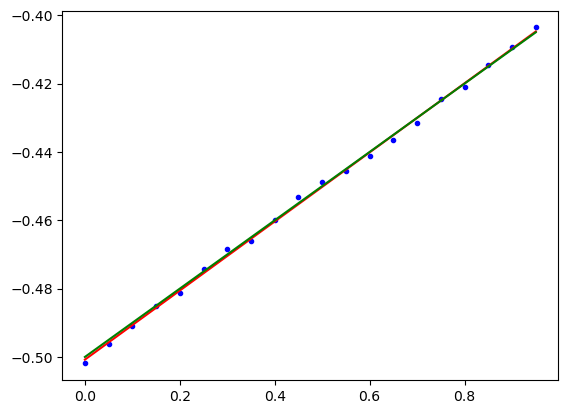

In [7]:
plt.plot(X, Y, ".b")
plt.plot(X, Y_pred, "r")
plt.plot(X, Y_gt, "g")
plt.show()

## A faire

- Observer la robustesse du modèle en faisant varier l'intensité du bruit sur les exemples
- Observer le résultat de l'apprentissage pour d'autres fonctions affines